### *Q: When is the season and off season in each city? Compare between how and why the price varies in each city?*

<font size ='3'>*First, let's read in the data and necessary libraries*<font/>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from mypy import print_side_by_side
from mypy import display_side_by_side 
#https://stackoverflow.com/a/44923103/8067752
%matplotlib inline

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None 

b_cal = pd.read_csv('boston_calendar.csv')
s_cal = pd.read_csv('seatle_calendar.csv')

b_cal_1 = pd.read_csv('b_cal_1.csv', index_col =0 )
s_cal_1 = pd.read_csv('s_cal_1.csv', index_col =0 )

b_list_d = pd.read_csv('b_list_d.csv', index_col = 0)
s_list_d = pd.read_csv('s_list_d.csv', index_col = 0)

b_rev_score = pd.read_csv('b_rev_score.csv', index_col = 0)
s_rev_score = pd.read_csv('s_rev_score.csv', index_col = 0)

In [4]:
seattle_w = pd.read_csv('.\\drafts\\seatle_weather.csv')
boston_w = pd.read_csv('.\\drafts\\boston_weather.csv')

<font size ='3'>*I read in 2 csv files from kaggle containing weather data of Boston and Seattle from [here](https://www.kaggle.com/jqpeng/boston-weather-data-jan-2013-apr-2018) and [here](https://www.kaggle.com/rtatman/did-it-rain-in-seattle-19482017?select=seattleWeather_1948-2017.csv) to help answet the research question and minimize unknown variables. Using the Weather data let's extract a panda series for temperatures in each city spaning the same time period we have in our data*<font/>

In [5]:
def create_dateparts(df, date_col): 
    df[date_col] = pd.to_datetime(df[date_col])
    b_date_df = pd.DataFrame()
    b_date_df['year'] = df[date_col].dt.year
    b_date_df['month'] = df[date_col].dt.month
    b_date_df['day'] =df[date_col].dt.strftime("%A")
    df = df.join(b_date_df)
    return df
seattle_weather = create_dateparts(seattle_w,'DATE')
seattle_weather = seattle_weather[seattle_weather['year']==2016].reset_index()
seattle_weather['mean_temp'] = (seattle_weather['TMAX'] + seattle_weather['TMIN'])/2
s_weather = seattle_weather.iloc[:-1,:]['mean_temp']
b_weather = boston_w.iloc[3166:3531,:].groupby(['Year','Month','Day'])['Avg Temp (F)'].mean().reset_index()['Avg Temp (F)'].rename('mean_temp')

 _______________________________________________________________________________________________________________________

### Task 2: Data Understanding 

<font size ='3'>*Let's take a look at the descriptive statistics of **`price`** and **`mean_temp`**.*<font/>

In [6]:
display_side_by_side(b_cal_1['price'].describe().reset_index().rename(columns = {'index':'statistic'}).iloc[1:,:],
                     s_cal_1['price'].describe().reset_index().rename(columns = {'index':'statistic'}).iloc[1:,:],
                     b_weather.describe().reset_index().rename(columns = {'index':'statistic'}).iloc[1:,:],
                     s_weather.describe().reset_index().rename(columns = {'index':'statistic'}).iloc[1:,:],
                     titles = ['Price in Boston','Price in Seattle', 'Average temp. in Boston', 'Average temp. in Seattle'])

,statistic,price
1,mean,198.436227
2,std,180.153959
3,min,11.000000
4,25%,85.000000
5,50%,150.000000
6,75%,255.000000
7,max,7163.000000
,statistic,price
1,mean,137.944859
2,std,105.062870


><font size ='3'>**Looks like the average price and median price in Boston are significantly higher than in Seattle**<font/>
 <br><br>

<font size ='3'>*Let's start with plotting the no. of available lisings vs average price to check the variation - on a higher resolution - by days of the week*<font/>

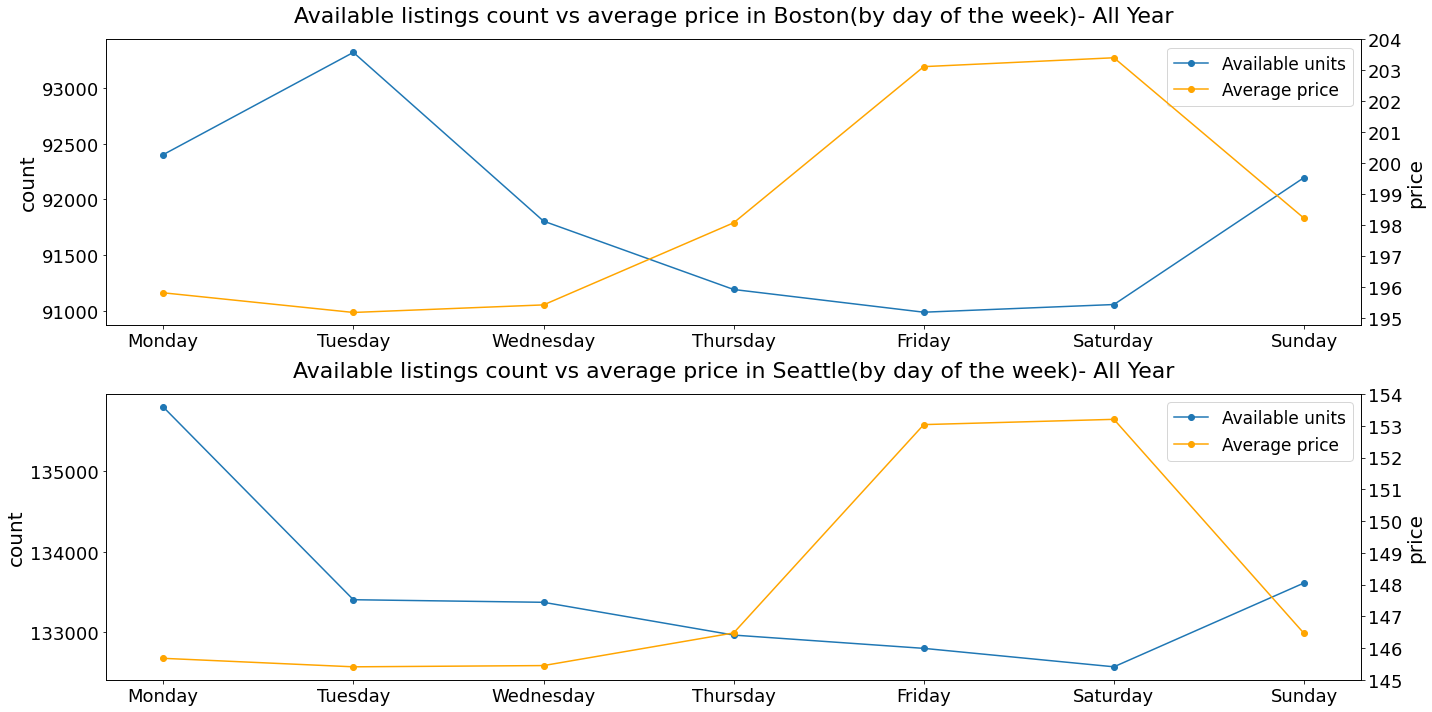

In [7]:
pd.options.mode.chained_assignment = None 
b_dow = b_cal_1[b_cal_1['available']==1].groupby(['day'])['available'].count().reset_index().rename(columns ={'available': 'available_units'}).reindex([1,5,6,4,0,2,3]).reset_index(drop = True)
s_dow = s_cal_1[s_cal_1['available']==1].groupby(['day'])['available'].count().reset_index().rename(columns ={'available': 'available_units'}).reindex([1,5,6,4,0,2,3]).reset_index(drop = True)

b_dow_price = b_cal_1[b_cal_1['available']==1].groupby(['day'])['price'].mean().reset_index().reindex([1,5,6,4,0,2,3]).reset_index(drop = True)
s_dow_price = s_cal_1[s_cal_1['available']==1].groupby(['day'])['price'].mean().reset_index().reindex([1,5,6,4,0,2,3]).reset_index(drop = True)

plt.figure(figsize=(20,10))

ax = plt.subplot(2,1,1)
ax.set_title('Available listings count vs average price in Boston(by day of the week)- All Year',pad =17, fontdict = {'fontsize':22})
availibility, = ax.plot(b_dow.day, b_dow.available_units, marker ='o');
ax2 = ax.twinx()
price, = ax2.plot(b_dow.day, b_dow_price.price,color="orange", marker ='o')
# loc, lab = plt.yticks()
ax.legend([availibility,price],['Available units','Average price'],loc = 'upper right',prop={'size': 17})
ax.set_ylabel('count', fontsize = 20)
plt.yticks(np.arange(195,205,1),np.arange(195,205,1),fontsize= 14)

#plt.xticks(np.arange(0,7,1), list(b_cal_day['day'].unique()))
ax.tick_params(axis='both', which='major', labelsize=18)
ax2.tick_params(axis='both', which='major', labelsize=18)
ax2.set_ylabel('price', fontsize = 20)

ax =plt.subplot(2,1,2)
ax.set_title('Available listings count vs average price in Seattle(by day of the week)- All Year',pad =17, fontdict = {'fontsize':22})
ax.plot(s_dow.day, s_dow.available_units, marker ='o');
ax2 = ax.twinx()
ax2.plot(s_dow.day, s_dow_price.price,color="orange", marker ='o');
loc, lab = plt.yticks()
ax.legend([availibility,price],['Available units','Average price'],loc = 'upper right',prop={'size': 17})
ax.set_ylabel('count', fontsize = 20)
plt.yticks(np.arange(135,145,1),np.arange(145,155,1),fontsize= 14)

ax2.set_ylabel('price', fontsize = 20)

ax.tick_params(axis='both', which='major', labelsize=18)
ax2.tick_params(axis='both', which='major', labelsize=18)

plt.tight_layout()

<font size ='3'>**Let's unpack the main points we take away from the two plots:**<font/><br>
>* <font size ='3'>**When a unit is not available on airbnb's website, it's either because it's no longer available for rent or because it's already occupied by a guest, but we cannot ascertain which is it, furthermore, the available units count by day and their price have a clear inverse relationship showcasing a clear supply and demand pattern.**<font/> 
<br><br>
>* <font size ='3'>**Both cities follow similar patterns, the week starts with relatively high available units and through the week, the availability keeps decreasing, in other words the rentals keep increasing until the weekend, when rentals decrease again as the available units increase by the begining of the next week and the cycle continues. Keep in mind that the y-axes don't start at 0 and the variation for availability is accumalitively between 2000 units in Boston and 300 units in Seattle as for price, it varies by around 9 dollars in both cities.**<font/>
 <br><br>
>* <font size ='3'>**It's clear that there is a surge in price around Fridays and Saturdays in both cities which indicates that it would be slightly more profitable to increase listings' prices if they are to be rented in or starting the weekends.**<font/> 
<br><br>
>* <font size ='3'>**It's noticed that the trend of increasing availabilities starting Sunday is reverted after Monday in Seattle, but in Boston it goes on until Tuesday. These differences could be due to the massive differences in their touristic natures, as Boston's reveneus from tourism is significantly higher (around 3 times according to [this](https://www.seattletimes.com/opinion/editorials/introduce-visitors-to-a-broad-array-of-seattles-gems/) and [this](https://www.visitma.com/media-industry-portal/stats-reports/))or because Boston is on average more expensive so people tend to stay for shorter periods, we have no conclusive evidence for either hypothesis.**<font/>
<br><br>

<font size ='3'>*Let's take the monthly averages of temperatures to have neater plots.*<font/>

In [8]:
def get_monthly_averages(df):
    temp_avg = []
    avg_month = []
    for i in range(0,len(b_weather)):
        if i%30 !=0:
            avg_month.append(df[i])
        if i%30 ==0:
            if len(avg_month)> 0:
                temp_avg.append(round(np.mean(np.array(avg_month)),1))
                avg_month = []
    return temp_avg
b_w = get_monthly_averages(b_weather)
s_w = get_monthly_averages(s_weather)
b_order = b_cal_1.groupby(['month'])['day'].count().reset_index()['month']*30
s_order = s_cal_1.groupby(['month'])['day'].count().reset_index()['month']*30

<font size ='3'>*Let's plot the availability count, average price and mean temperature by months of the year*<font/>

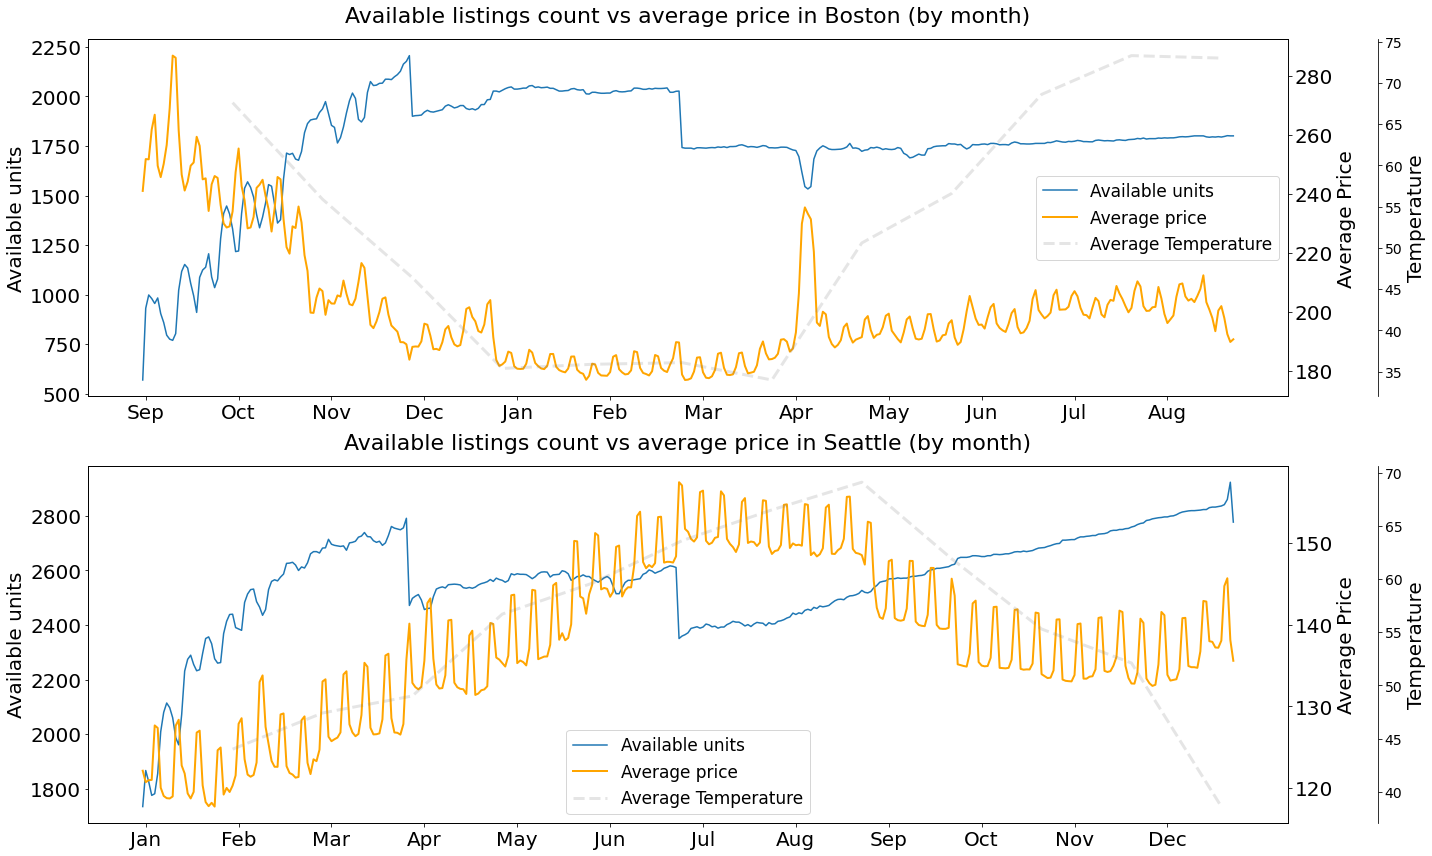

In [9]:
b_cal_date = b_cal_1[b_cal_1['available']==1].groupby(['date'])['available'].count().reset_index().rename(columns ={'available': 'available_units'})
b_cal_date['n_month']= pd.to_datetime(b_cal_date['date']).apply(lambda x : x.strftime("%b"))
s_cal_date = s_cal_1[s_cal_1['available']==1].groupby(['date'])['available'].count().reset_index().rename(columns ={'available': 'available_units'})
s_cal_date['n_month']= pd.to_datetime(s_cal_1['date']).apply(lambda x : x.strftime("%b"))
b_cal_price = b_cal_1[b_cal_1['available']==1].groupby(['date'])['price'].mean().reset_index()
s_cal_price = s_cal_1[s_cal_1['available']==1].groupby(['date'])['price'].mean().reset_index()

plt.figure(figsize=(20,12))
####################################################################
ax = plt.subplot(2,1,1)
availibility, = ax.plot(b_cal_date.date, b_cal_date.available_units);
ax.set_title('Available listings count vs average price in Boston (by month)',pad =17, fontdict = {'fontsize':22})
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_ylabel('Available units', fontsize = 20)

ax2 = ax.twinx()
price, = ax2.plot(b_cal_date.date, b_cal_price.price,color="orange",linewidth =2)
ax2.tick_params(axis='both', which='major', labelsize=20)
ax2.set_ylabel('Average Price', fontsize = 20)
ax2.tick_params(axis='both', which='major', labelsize=20)

ax3 = ax.twinx()
weather, = ax3.plot(b_order, b_w,linestyle ='--',linewidth =3, alpha = .2, color ='grey')
ax3.spines['right'].set_position(('outward', 90))
ax3.tick_params(axis='both', which='minor', labelsize=25)
ax3.set_ylabel("Temperature", fontsize = 20)
ax3.xaxis.set_ticks([])

plt.yticks(fontsize= 14)
plt.xticks(np.arange(1,365,31), list(b_cal_date['n_month'].unique()))

ax.legend([availibility,price, weather],['Available units','Average price','Average Temperature'],loc = 'center right',prop={'size': 17})
#####################################################################

ax =plt.subplot(2,1,2)
availability, = ax.plot(s_cal_date.date, s_cal_date.available_units);
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_title('Available listings count vs average price in Seattle (by month)',pad =17, fontdict = {'fontsize':22})
ax.set_ylabel('Available units', fontsize = 20)

ax2 = ax.twinx()
price, = ax2.plot(s_cal_date.date, s_cal_price.price,color="orange",linewidth =2);
ax2.tick_params(axis='both', which='major', labelsize=20)
ax2.set_ylabel('Average Price', fontsize = 20)
ax2.tick_params(axis='both', which='major', labelsize=20)

ax3 = ax.twinx()
weather, = ax3.plot(s_order, s_w,linestyle ='--',linewidth =3, alpha = .2, color ='grey')
ax3.spines['right'].set_position(('outward', 90))
ax3.tick_params(axis='both', which='minor', labelsize=25)
ax3.set_ylabel("Temperature", fontsize = 20)
ax3.xaxis.set_ticks([])

plt.yticks(fontsize= 14)
plt.xticks(np.arange(1,365,31),list(s_cal_date['n_month'].unique()))

ax.legend([availibility,price, weather],['Available units','Average price','Average Temperature'],loc = 'lower center',prop={'size': 17})
###################################################################
plt.tight_layout()

<font size ='3'>**The two plots are packed with infomration, yet, making comparisons between the two cities won't be as straight forward as expected because the ranges of the x-axes are different. Let's divide the two plots by months marking the major changes in either price or availability**<font/>

><font size ='3'>**In Boston:**</font>
<br>
>* <font size ='3'>**From <u>September to November: </u> There is a trend of increased availability that fluctuates probably because the changes in the days of the week as seen in previous plots -needs to be further confirmed. On the other hand the average price decreases probably due to the decreased in demand which goes in accordance to the decrease in temperature that is often an important factor in traveling and short-term stay plans**<font/>
<br><br>
>* <font size ='3'>**From <u>December to March:</u> There are two sudden drops in availability, none of them are accompanied by equivalent surges in the average price which indicates it's due to one or more policy changes that are imposed by the legislative or executive authorities -as we'll se later in Seattle- and/or that airbnb decided to remove bulks of listings due to lack of verifications or extremely low ratings as mentioned [here](https://www.dpgo.com/go/airbnb-listing-suspended/). Some support to this theory comes form the consitent reports of contention between airbnb and the states they operate in because the rise of short-term rentals especially hosts who rent several properties has implications on several other crucial industries pushing the states'legislators to impose regulatory policies**.</font>
<br><br>
>* <font size ='3'>**Moreover, these drops happen in consecutive 3 month periods, perhaps they occur periodically, but I couldn't find the evidence to support these hypotheses. Away from that, the overall trend of the increase in availability and the decrease in the average price goes hand in hand with the decrement and then the relative stability of average temperature at 30°F.**</font>
<br><br>
>* <font size ='3'>**From <u>April to August</u>: There is a sudden drop of available unit counts in April but there is a clear corresponding surge in the average price and that's very likely due to the Boston marathon, which is an annual marathon race hosted in Boston on the 3rd Friday in April as mentioned [here](https://en.wikipedia.org/wiki/Boston_Marathon). After the race, the average price and available units stablize until the end of the year with a slight increase in average price which could be explained by the increase in temperature.** <font/>
<br><br><br>
>
><font size ='3'>**In Seattle:**</font>
<br>
>* <font size ='3'>**From <u>January to March: </u> There is a trend of increased availability similar to Boston's from Septemer to November with fluctuations as well but the average price is acting on contrary to what's expected as it increases with availability.**<font/>
<br><br> 
>* <font size ='3'>**From <u>April to June: </u> there are 2 sudden drops in availability one in April and the other is in July, these sudden drops are uncoupled with corresponding changes in the average price, which - as mentioned in Boston's case - are very likely due to policies imposed by state legislation, the drop in April might be explained by [this](https://techcrunch.com/2017/04/24/seattle-short-term-rental-license-2017/) and the one in July might be explained by this [this](https://cdn.geekwire.com/wp-content/uploads/2016/07/Short-term-rental-modified-policy-approach.pdf) and [this](https://www.geekwire.com/2016/seattle-lawmakers-want-ban-short-term-airbnb-homeaway-rentals-secondary-homes/) too, while average price on the other hand continues it's rising trend, availability stablizes between the 2 drops.**<font/>
<br><br> 
>* <font size ='3'>**From <u>July to December: </u>, the average price keeps increasing and then stabilizes in July and August and then goes on decreasing until the end of the year coupled with an increase in available units count, a trend that starts in July.**<font/>
<br><br> 
>* <font size ='3'>**From what we see in the plots, the changes in availability and price don't follow the pattern that you'd expect as it's the case in Boston, on the other hand, the monthly average temperature closely resembles the changes in price which is a better predictor in Seattle's case probably because the it has colder summers although Boston's has on average lower minimum temperatures year round.**<font/>    
<br><br> 
>
><font size ='3'>**Finally:**</font><br><br>
>1- <font size ='3'>**Let's investigate the cause of the fluctuations (group by day in the same time period)**<font/><br>
>2- <font size ='3'>**Let's check the correlations between our variables**<font/>

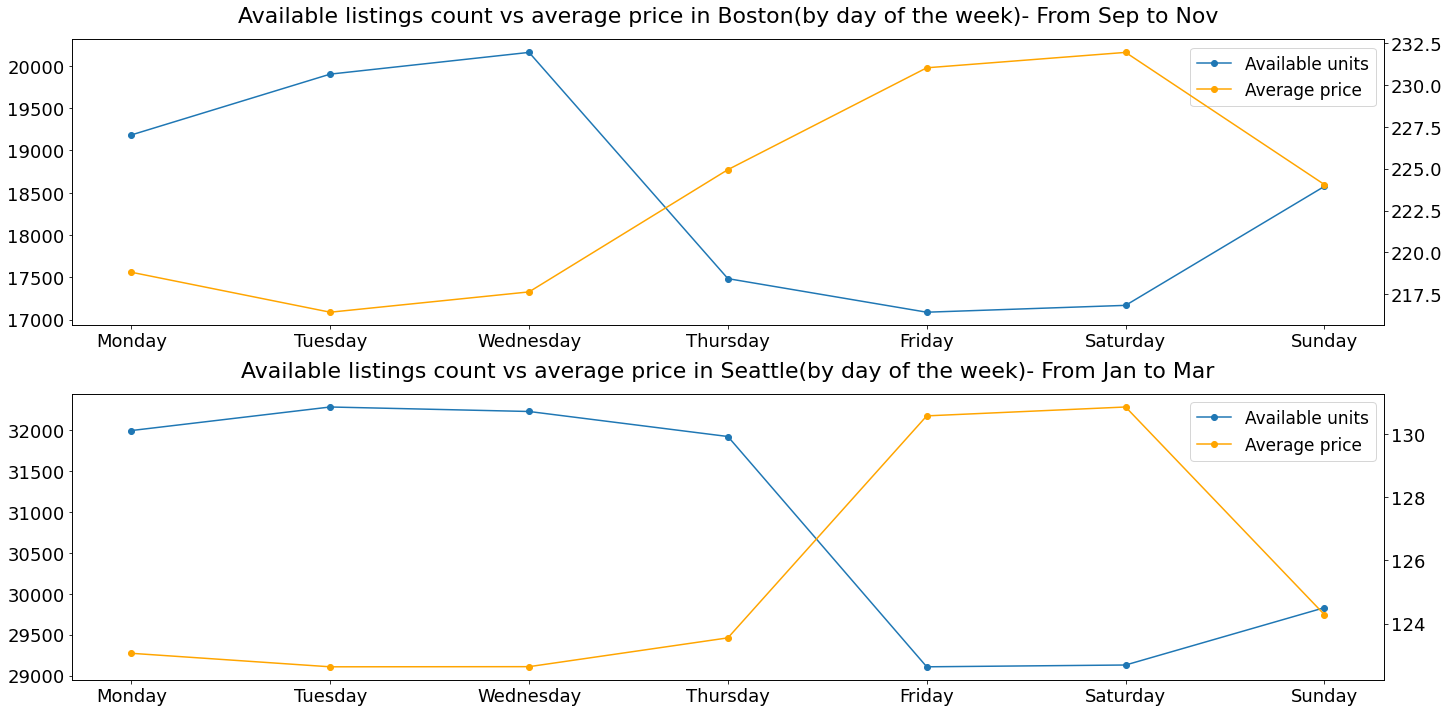

In [10]:
plt.figure(figsize=(20,10))
ax = plt.subplot(2,1,1)
b_dow = b_cal_1[(b_cal_1['available']==1) & (b_cal_1.month.isin([9,10,11])) &(b_cal_1.year.isin([2016]))].groupby(['day'])['available'].count().reset_index().rename(columns ={'available': 'available_units'}).reindex([1,5,6,4,0,2,3]).reset_index(drop = True)
b_dow_price =b_cal_1[(b_cal_1['available']==1) & (b_cal_1.month.isin([9,10,11]))&(b_cal_1.year.isin([2016]))].groupby(['day'])['price'].mean().reset_index().rename(columns ={'available': 'average_price'}).reindex([1,5,6,4,0,2,3]).reset_index(drop = True)

ax.set_title('Available listings count vs average price in Boston(by day of the week)- From Sep to Nov',pad =17, fontdict = {'fontsize':22})
availibility, = ax.plot(b_dow.day, b_dow.available_units, marker ='o');
ax2 = ax.twinx()
price, = ax2.plot(b_dow.day, b_dow_price.price,color="orange", marker ='o')
plt.yticks(fontsize= 14)
ax.legend([availibility,price],['Available units','Average price'],loc = 'upper right',prop={'size': 17})
ax.tick_params(axis='both', which='major', labelsize=18)
ax2.tick_params(axis='both', which='major', labelsize=18)

ax =plt.subplot(2,1,2)
s_dow = s_cal_1[(s_cal_1['available']==1) & (s_cal_1.month.isin([1,2,3]))&(s_cal_1.year.isin([2016]))].groupby(['day'])['available'].count().reset_index().rename(columns ={'available': 'available_units'}).reindex([1,5,6,4,0,2,3]).reset_index(drop = True)
s_dow_price =s_cal_1[(s_cal_1['available']==1) & (s_cal_1.month.isin([1,2,3]))&(s_cal_1.year.isin([2016]))].groupby(['day'])['price'].mean().reset_index().rename(columns ={'available': 'average_price'}).reindex([1,5,6,4,0,2,3]).reset_index(drop = True)
ax.set_title('Available listings count vs average price in Seattle(by day of the week)- From Jan to Mar',pad =17, fontdict = {'fontsize':22})
ax.plot(s_dow.day, s_dow.available_units, marker ='o');
ax2 = ax.twinx()
ax2.plot(s_dow.day, s_dow_price.price,color="orange", marker ='o');
plt.yticks(fontsize= 14)
ax.legend([availibility,price],['Available units','Average price'],loc = 'upper right',prop={'size': 17})
ax.tick_params(axis='both', which='major', labelsize=18)
ax2.tick_params(axis='both', which='major', labelsize=18)


plt.tight_layout()

In [11]:
print('Range of variability in Boston/ Maximum count of available units = ', (20000-17000)/20000)
print('Range of variability in Seattle/ Maximum count of available units = ', (32000-29000)/32000)

Range of variability in Boston/ Maximum count of available units =  0.15
Range of variability in Seattle/ Maximum count of available units =  0.09375


><font size ='3'>**Seems like the fluctuations of availability in the first 3 months in both cities are explained by the behavior through the days of the week, when we look at the ratio between the range of variability and the maximum number of units in Boston : 0.15, in  Seattle: 0.09 and this explains the difference in the amplitudes of the fluctuations in both cities as Boston fluctuates more.**<font/>

<font size ='3'>*Let's take a look at the correlations*<font/>

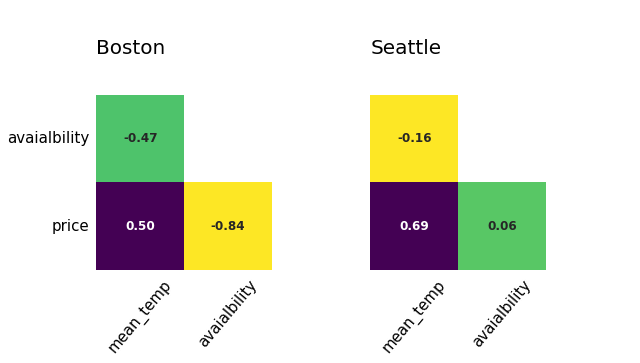

In [12]:
b_corr = pd.concat([b_weather,b_cal_date.available_units,b_cal_price.price], axis = 1).corr()
s_corr = pd.concat([s_weather,s_cal_date.available_units,s_cal_price.price], axis = 1).corr()
mask_b = np.triu(np.ones_like(b_corr.corr()))
mask_s = np.triu(np.ones_like(s_corr.corr()))

fig = plt.figure(figsize = (9,7))

ax1 = fig.add_subplot(1, 2, 1) 
plt.title('Boston', fontsize = 20, loc = 'left', y=.8)
p1 = sns.heatmap(b_corr,mask = mask_b,square=True,ax =ax1,cbar = False, annot_kws = {'fontsize':12, 'fontweight': 'bold'},cmap = 'viridis_r', annot = True, fmt = '.2f');
plt.yticks([1,1.5,2.5],['','avaialbility','price'],fontsize = 15, rotation = 0)
plt.xticks([.5,1.5,2.5],['mean_temp','avaialbility',""],fontsize = 15, rotation = 50)
ax1.tick_params(left=False, bottom=False)

ax2 = fig.add_subplot(1, 2, 2)

plt.title('Seattle', fontsize = 20, loc ='left', y=.8)
p2 = sns.heatmap(s_corr,mask = mask_s,square=True, ax =ax2, cbar = False, annot_kws = {'fontsize':12, 'fontweight': 'bold'},cmap = 'viridis_r', annot = True, fmt = '.2f');
frame = plt.gca()
frame.axes.get_yaxis().set_ticks([])
plt.tight_layout()
plt.xticks([.5,1.5,2.5],['mean_temp','avaialbility',""],fontsize = 15, rotation = 50)
ax2.tick_params(left=False, bottom=False);

>* <font size ='3'>**The correlation heatmap confirms our take away points from the plots, as it seems that in Boston avaialbility and price do have a very strong relationship of whopping 0.84 but in Seattle the avaialability and price have an extremely weak relationship of 0.06.**</font>
<br><br>
>* <font size = '3'>**As for the average temperature it has a strong relationship with price and availability in Boston of 0.50 and 0.47 respectively but in Seattle it has an even stronger relationship with price of 0.69 but not as much with theavailability.**<font/>

><font size = '3'>**Further exploration:**</font>
<br>
>* <font size = '3'>**What influences the behaviour of availability in Seattle?**</font>
>* <font size = '3'>**Use scrapped data about touristic assets, economical and industrial niches and real estate trends to better understand behaviour of price through the year**</font>
>* <font size = '3'>**Is there a way to infer real availbility not only the airbnb system's?**</font>

_______________________________________________________________________________________________________________________